--------------
## Getting the length of segents between two upstream and downstream segments for calculating the length of each gauge to the next 

In [75]:
# load modules
import geopandas as gpd
import numpy     as np
import pandas    as pd
import xarray    as xr
import os
 
# assigning input files
input_river = '/Users/shg096/Desktop/MERIT_Hydro/riv/riv_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'

# load the files and calculating the downstream of each segment
riv  = gpd.read_file(input_river)

riv ['x'] = riv.centroid.x
riv ['y'] = riv.centroid.y
riv = riv [riv['x']>-111.0]
riv = riv [riv['x']<-106.0]
riv = riv [riv['y']>49.0]
riv = riv [riv['y']<52.5]


def get_all_downstream (seg_IDs,
                        down_IDs):
    """
    @ author:                  Shervan Gharari
    @ Github:                  https://github.com/ShervanGharari/EASYMORE
    @ author's email id:       sh.gharari@gmail.com
    @ license:                 GNU-GPLv3
    This function get a 1-D array of numpy arrays of river reach ID and a similar 1-D array
    of downstream river reach ID
    Arguments
    ---------
    seg_IDs: the 1D array of seg id [n,]
    down_IDs: the 1D array of downstream seg id [n,]; if no down_IDs for a given segment should be negative
    Returns
    -------
    NTOPO: the 2D array of downsream seg id s [n,10000]; 10000 is maximume number of downstream
    """
    import pandas as pd
    import numpy as np
    #
    seg_IDs = np.array(seg_IDs)
    down_IDs = np.array(down_IDs)
    NTOPO = np.empty([len(seg_IDs),10000]) # create the empty array with length of seg_IDs and 10000
    NTOPO [:] = np.nan # populate with nan
    NTOPO [:,0] = seg_IDs # assign the first colomn as seg id
    # loop over the seg_IDs
    for i in np.arange(len(seg_IDs)):
        ID = seg_IDs [i] # get the seg ID
        down_ID = down_IDs [i] # get the seg downstream ID
        if down_ID in seg_IDs: # check if the downstream seg is part of river network
            down_stream_exists = True
        else:
            down_stream_exists = False
        m = 1 # initialize m
        while down_ID > 0 and down_stream_exists: # while not the last segment
            # update the ID and ID down
            idx = np.where (seg_IDs == down_ID) # get the index of the segment that is downstream
            ID = seg_IDs [idx] # update the ID
            down_ID = down_IDs [idx] # update the downstream
            if down_ID in seg_IDs:
                down_stream_exists = True
            else:
                down_stream_exists = False
            NTOPO[i,m] = ID
            m += 1
    return NTOPO
    
# get all the upstream
NTOPO        = get_all_downstream (np.array(riv.COMID),np.array(riv.NextDownID))


/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_47312/2169533179.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  riv ['x'] = riv.centroid.x
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_47312/2169533179.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  riv ['y'] = riv.centroid.y


from lake difenbaker to saskatoon :  152.86296693226004
from medicine hat to confluence with red deer :  232.0183437522174
from red deer and south sask confluence to the lake diefenbaker :  57.38450365872657
from red deer at 05CK004 to confluence with south saskatchewan river :  69.85180080062982
from swift current at 05HD039 to confluence with south saskatchewan river :  25.930268944405697
No Lake, from historical confluence of swift current and SSR to future gardiner dam :  155.1828656834903
No Lake, from where lakes diefnebaker starts to historical confluence of swift current and SSR :  152.75871553003276


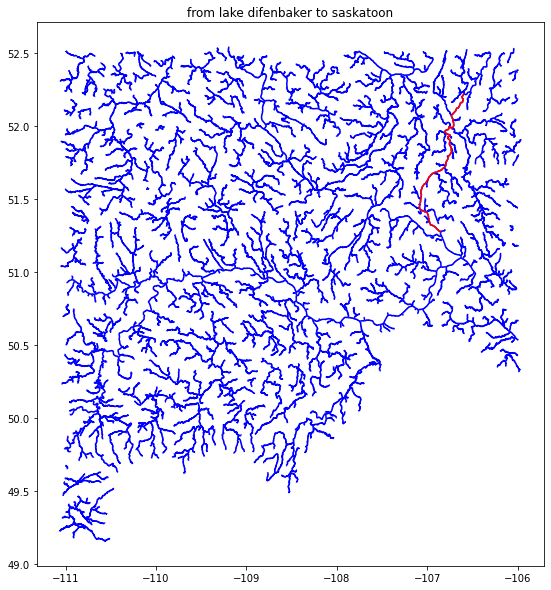

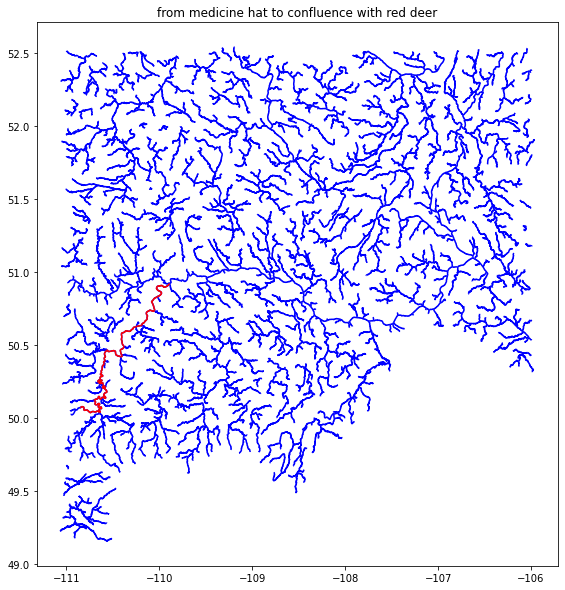

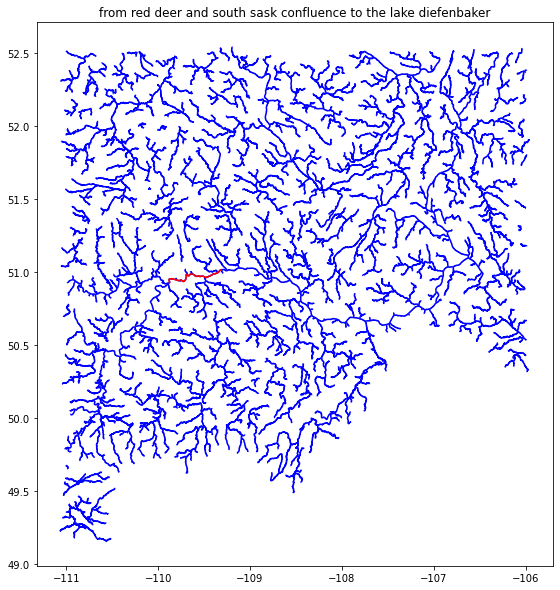

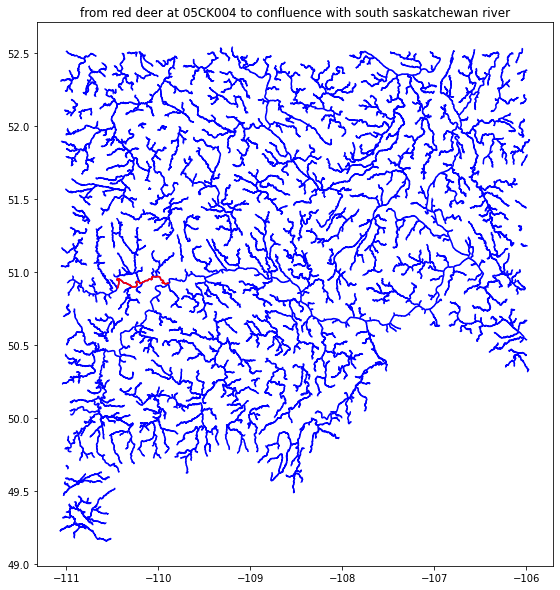

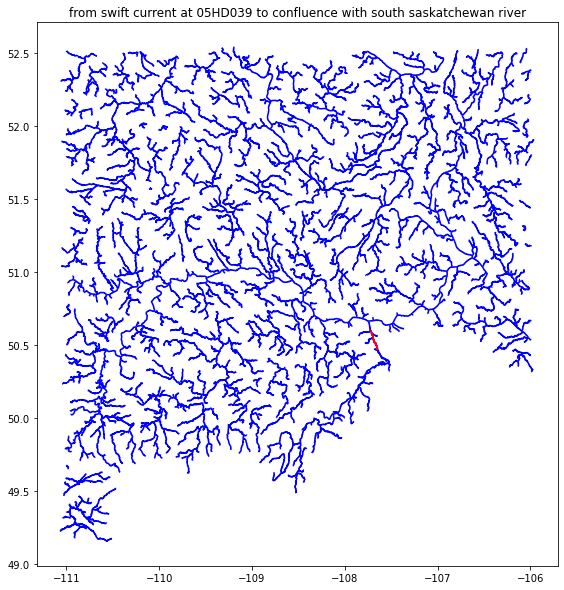

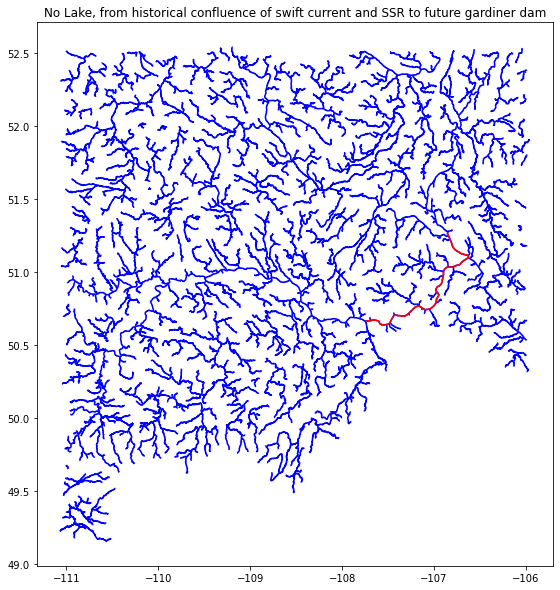

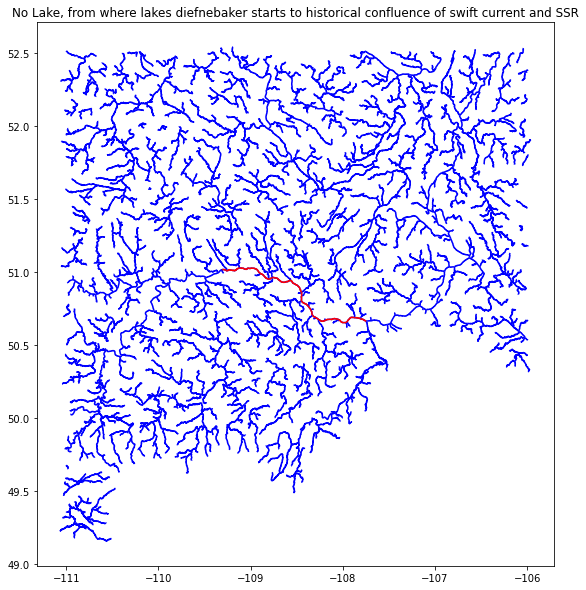

In [76]:
import matplotlib.pyplot as plt

# initialize list of lists
data = [[71027284, 71021602, np.nan, 'from lake difenbaker to saskatoon'],\
        [71033569, 71033518, np.nan, 'from medicine hat to confluence with red deer'],\
        [71033514, 71027305, np.nan, 'from red deer and south sask confluence to the lake diefenbaker'],\
        [71033887, 71033867, np.nan, 'from red deer at 05CK004 to confluence with south saskatchewan river'],\
        [71034043, 71034038, np.nan, 'from swift current at 05HD039 to confluence with south saskatchewan river'],\
        [71033455, 71027285, np.nan, 'No Lake, from historical confluence of swift current and SSR to future gardiner dam'],\
        [71027304, 71033456, np.nan, 'No Lake, from where lakes diefnebaker starts to historical confluence of swift current and SSR']]
        
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['up', 'down', 'length','explain' ])


for index, row in df.iterrows():
    
    up_segmenet = row.up
    down_segment = row.down

    down_seg_1  = NTOPO[np.where(NTOPO[:,0]==up_segmenet),:]
    down_seg_1  = down_seg_1[~np.isnan(down_seg_1)]

    down_seg_2  = NTOPO[np.where(NTOPO[:,0]==down_segment),:]
    down_seg_2  = down_seg_2[~np.isnan(down_seg_2)]

    L = down_seg_1[~np.isin(down_seg_1,down_seg_2)]
    L = np.append(L,down_segment)
    L_riv = riv.loc[riv['COMID'].isin(L)]
    df.loc[index,'length'] = L_riv.lengthkm.sum()
    print(df.loc[index,'explain'], ': ', df.loc[index,'length'])
    fig, axs = plt.subplots(1, 1, figsize=(30, 10))
    riv.plot(color='b',ax=axs)
    L_riv.plot(color='r',ax=axs)
    plt.title(df.loc[index,'explain'])


In [113]:
# create the river network topology with lake:

if not os.path.isdir('../data/netwroktopology/'):
    os.makedirs('../data/netwroktopology/')

# initialize list of lists with lake
data = [[ 70, 1, 3, 'from red deer at 05CK004 to confluence of red deer and south saskatchewan river'],\
        [230, 2, 3, 'from medicine at 05AJ001 to confluence of red deer and south saskatchewan river'],\
        [ 50, 3, 11, 'confluence of red deer and south saskatchewan river to the lake diefenbaker'],\
        [ 30, 4, 11, 'from swift current at 05HD039 to lake diefenbaker'],\
        [150, 5, -9999, 'No lake: from start of lake difenbaker to historical confluence of swift current and SSR'],\
        [150, 6, -9999, 'No lake: from historical confluence of swift current and SSR to future gardiner dam'],\
        [1500, 7, -9999, 'from gardiner dam to saskatoon'],\
        [  1,11, 7, 'lake']]
df = pd.DataFrame(data, columns=['length[km]', 'code', 'to_code', 'explain' ])
netwrok_topology_save_loc = '../data/netwroktopology/with_lake.nc'
# from the gardiner dam to saskatoon is 150 however is taken longer to simulate after saskatoon as well,
# the simulatio for saskatoon should be read at segment 7015

# # initialize list of lists witout lake
# data = [[ 70, 1, 3, 'from red deer at 05CK004 to confluence of red deer and south saskatchewan river'],\
#         [230, 2, 3, 'from medicine at 05AJ001 to confluence of red deer and south saskatchewan river'],\
#         [ 50, 3, 5, 'confluence of red deer and south saskatchewan river to the lake diefenbaker'],\
#         [ 30, 4, 6, 'from swift current at 05HD039 to lake diefenbaker'],\
#         [150, 5, 6, 'No lake: from start of lake difenbaker to historical confluence of swift current and SSR'],\
#         [150, 6, 7, 'No lake: from historical confluence of swift current and SSR to future gardiner dam'],\
#         [1500, 7, -9999, 'from gardiner dam to saskatoon'],\
#         [  1,11, -9999, 'lake']]
# df = pd.DataFrame(data, columns=['length[km]', 'code', 'to_code', 'explain' ])
# netwrok_topology_save_loc = '../data/netwroktopology/without_lake.nc'


network_topology = pd.DataFrame()

for index, row in df.iterrows():
    df_temp = pd.DataFrame(columns=['ID','ID_next','area','length','islake','lake_type','target_vol','slope','width'])
    df_temp ['ID'] = np.arange(int(row['length[km]'])/10) + row['code']*1000 + 1
    df_temp ['ID_next'] = np.arange(int(row['length[km]'])/10) + row['code']*1000 + 2
    if row['to_code'] > 0:
        df_temp ['ID_next'].iloc[-1] = row['to_code']*1000 + 1
    else:
        df_temp ['ID_next'].iloc[-1] = row['to_code']
    if row['code'] == 11:
        df_temp ['islake'] = 1
        df_temp ['lake_type'] = -1
        df_temp ['target_vol'] = 1
    else:
        df_temp ['islake'] = 0
        df_temp ['lake_type'] = -1
        df_temp ['target_vol'] = 0
    df_temp ['slope'] = 0.001 # not used in this example as we use IRF
    df_temp ['width'] = 200 # not used in this example as we use IRF
    df_temp ['area'] = 1 # m2, just to put a number
    df_temp ['length'] = 10000 # 10 km, or 10000 m for each segment
    #
    network_topology = pd.concat([network_topology,df_temp])

#    
network_topology ['ID'] = network_topology ['ID'].astype(int)
network_topology ['ID_next'] = network_topology ['ID_next'].astype(int)
network_topology ['islake'] = network_topology ['islake'].astype(int)
network_topology ['lake_type'] = network_topology ['lake_type'].astype(int)
network_topology ['target_vol'] = network_topology ['target_vol'].astype(int)

#
network_topology = network_topology.reset_index(drop=True)



network_topology = network_topology.to_xarray()
encoding = {'ID': {'dtype': 'int64', '_FillValue': -1},\
            'ID_next': {'dtype': 'int64', '_FillValue': -1},\
            'islake': {'dtype': 'int64', '_FillValue': -1},\
            'lall
            ke_type': {'dtype': 'int64', '_FillValue': -1},\
            'target_vol': {'dtype': 'int64', '_FillValue': -1},\
            'slope': {'dtype': 'float32', '_FillValue': -9999},\
            'width': {'dtype': 'float32', '_FillValue': -9999},\
            'area': {'dtype': 'float32', '_FillValue': -9999},\
            'length': {'dtype': 'float32', '_FillValue': -9999}}

#
if os.path.isfile (netwrok_topology_save_loc):
    os.remove(netwrok_topology_save_loc)
    
#
network_topology.to_netcdf(netwrok_topology_save_loc, encoding = encoding)

network_topology
    

<xarray.Dataset>
Dimensions:     (index: 219)
Coordinates:
  * index       (index) int64 0 1 2 3 4 5 6 7 ... 212 213 214 215 216 217 218
Data variables:
    ID          (index) int64 1001 1002 1003 1004 1005 ... 7148 7149 7150 11001
    ID_next     (index) int64 1002 1003 1004 1005 1006 ... 7149 7150 -9999 7001
    area        (index) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    length      (index) int64 10000 10000 10000 10000 ... 10000 10000 10000
    islake      (index) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 1
    lake_type   (index) int64 -1 -1 -1 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1 -1 -1
    target_vol  (index) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 1
    slope       (index) float64 0.001 0.001 0.001 0.001 ... 0.001 0.001 0.001
    width       (index) int64 200 200 200 200 200 200 ... 200 200 200 200 200

In [114]:
# creation of the input to the model 
abs_inj  = pd.DataFrame(columns=network_topology ['ID'])
target_vol  = pd.DataFrame(columns=network_topology ['ID'])
if not os.path.isdir ('../data/input/'):
    os.makedirs('../data/input/')

start = '2013-06-01'
end   = '2013-07-31' 

# read the 05CK004
df_temp = pd.read_csv('../data/HYDAT/05CK004_flow.csv')
df_temp ['time'] = pd.to_datetime(df_temp ['DATE'])
df_temp = df_temp.set_index(['time'])
df_temp = df_temp.loc[start:end]
abs_inj[1001] = df_temp['05CK004'] * -1

# read the 05AJ001
df_temp = pd.read_csv('../data/HYDAT/05AJ001_flow.csv')
df_temp ['time'] = pd.to_datetime(df_temp ['DATE'])
df_temp = df_temp.set_index(['time'])
df_temp = df_temp.loc[start:end]
abs_inj[2001] = df_temp['05AJ001'] * -1

# read the 05HD039
df_temp = pd.read_csv('../data/HYDAT/05HD039_flow.csv')
df_temp ['time'] = pd.to_datetime(df_temp ['DATE'])
df_temp = df_temp.set_index(['time'])
df_temp = df_temp.loc[start:end]
abs_inj[4001] = df_temp['05HD039'] * -1

# read the 05JG006
df_temp = pd.read_csv('../data/HYDAT/05JG006_flow.csv')
df_temp ['time'] = pd.to_datetime(df_temp ['DATE'])
df_temp = df_temp.set_index(['time'])
df_temp = df_temp.loc[start:end]
abs_inj[11001] = df_temp['05JG006'] * 1

# read the 05HF003
df_temp = pd.read_csv('../data/HYDAT/05HF003_volume.csv')
df_temp ['time'] = pd.to_datetime(df_temp ['DATE'])
df_temp = df_temp.set_index(['time'])
df_temp = df_temp.loc[start:end]
target_vol[11001] = df_temp['05HF003'] * 1

abs_inj = abs_inj.fillna(0)
#abs_inj.plot()

target_vol = target_vol.fillna(0)
#target_vol.plot()

forcing = abs_inj.copy()
forcing.loc[:,:] = 0

# 
combined = xr.DataArray(abs_inj).to_dataset(name='abs_inj')
combined['target_vol']= xr.DataArray(target_vol)
encoding = {'abs_inj': {'dtype': 'float32', '_FillValue': -1},\
            'target_vol': {'dtype': 'float32', '_FillValue': -1}}
if os.path.isfile('../data/input/WM.nc'):
    os.remove('../data/input/WM.nc')
combined.to_netcdf ('../data/input/WM.nc', encoding = encoding)
#combined['target_vol'].plot()
#combined['abs_inj'].plot(vmin = -100, vmax = 100)


combined = xr.DataArray(forcing).to_dataset(name='Precipitation')
encoding = {'Precipitation': {'dtype': 'float32', '_FillValue': -1}}
if os.path.isfile('../data/input/forcing.nc'):
    os.remove('../data/input/forcing.nc')
combined.to_netcdf ('../data/input/forcing.nc', encoding = encoding)
#combined['Precipitation'].plot()



'2013-06-26T12:56:00.0000000-06:00', 'Discharge': {'Unit': 'm^3/s', 'Numeric': 2290}, 'Comments': '==Activity Details:\r\nMethod:Bridge\r\nInstrument Type:ADCP\r\nSerial Number:647817\r\n==\r\n', 'Party': 'C.Garbutt, B.Bougher & EJ.Bercier', 'DistanceToGage': {'Unit': 'm'}, 'HorizontalFlow': 'Unknown', 'ChannelStability': 'Unknown', 'ChannelMaterial': 'Unknown', 'ChannelEvenness': 'Unknown', 'VerticalVelocityDistribution': 'Unknown', 'VelocityVariation': 'Unknown', 'MeasurementLocationToGage': 'Unknown', 'MeterSuspension': 'Unknown', 'DeploymentMethod': 'BridgeDownstreamSide', 'CurrentMeter': 'Unknown', 'MonitoringMethod': 'Acoustic Doppler Current Profiler'}, 'IsValid': True, 'MagneticVariation': {}, 'DischargeCoefficientVariation': {}, 'PercentOfDischargeMeasured': {}, 'TopEstimateExponent': {}, 'BottomEstimateExponent': {}, 'Width': {'Unit': 'm', 'Numeric': 161}, 'Area': {'Unit': 'm^2', 'Numeric': 946}, 'VelocityAverage': {'Unit': 'm/s', 'Numeric': 2.415},